# **Mobile Health Assessment 1**

This document contains your first assigment. First copy the colab notebook into your own google drive. Do not edit this version. Please fill in code where required in your copy, and answer the questions on an answer sheet (Word, Google Doc, LaTeX -- or anything else you prefer) . Clearly indicate which answers belong to which questions.

When you see this symbol ❓, fill in the answer in your answer sheet. Otherwise, only provide the code snippet and output of the code block. Include relevant images that you produce in this notebook on your answer sheet.

**Word limit:** Your answer sheet has a word limit of 1000 words. Please provide a word count at the end of the document. References and figure and table captions are not included in the word count.

## Submission instructions:
You need to submit both the colab notebook and your answer sheet.
1. Use the share option (right top) in colab to get a publicly sharable link. Put it in a .txt file named as colab.txt.
2. Download the colab as a .ipynb file.
3. Save the answer sheet as a pdf file.
4. Put all the above three files in a directory named as *your CRSID*. Also include your self-recorded wav file inside this folder. Then zip it and upload it to Moodle.

##Data instructions:
To access the data with this colab you need to save the data to your own google drive.

Go to this link to access the data: https://drive.google.com/drive/folders/1tT8t5Quna7tcY8DuZi8psdX7mH8BKCDA?usp=sharing

Then right click on the folder (mobile-health-assignment-1) and click "add shortcut to drive".

## Background

In this assignment, you will be working on heart sound data. To make it easier for you, we believe it might be beneficial to have some basic knowledge about the physiology of heart sounds.

Human heart has four valves that open and snap shut during the heartbeat to let the blood into the heart and let it out as shown in the below figure. During a single heartbeat, there are two sounds present, commonly referred to as S1 and S2, and are produced by the heart valves snapping shut. When the valves are not working as they should, they let some blood through, causing excessive blood turbulence and an additional sound known as murmur.

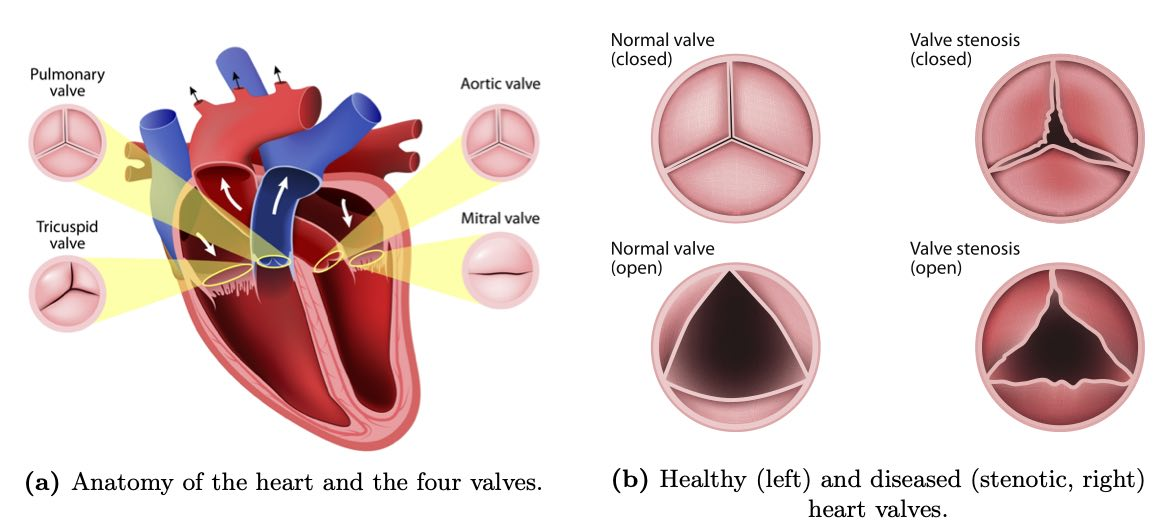

The different heart sounds produced in a healthy and diseased heart are shown in the below image.

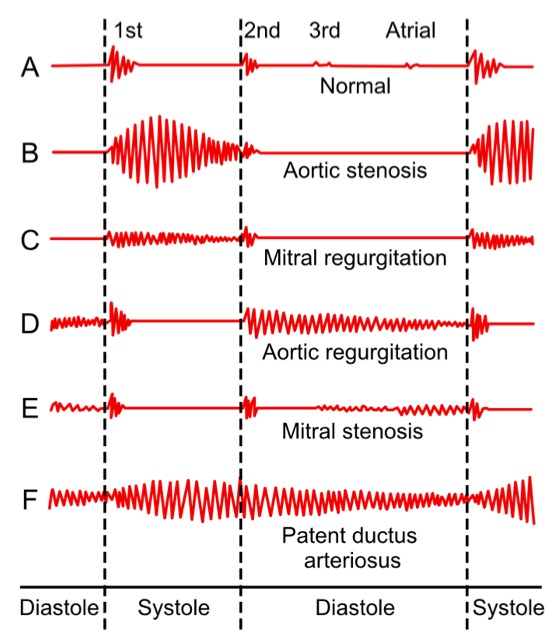

A cardiologist typically starts their diagnosis by listening to the patient's chest using a stethoscope, a process called auscultation. For cardiac auscultation, a doctor would listen to four locations on the chest, corresponding to the four valves in the heart. The cardiologist then can identify the diseased valve based on the timing of the murmur (whether it occurs between S1 and S2 or S2 and S1) and based on its shape. If a patient has a murmur present, it would commonly be caused by a pathology in one of the four valves. If the valve pathology is advanced, the murmur is likely to be high in amplitude and be audible from all four locations on the chest, whereas if the murmur is mild, it may only manifest in a few locations that are closer to the diseased valve, and not be audible from other locations.

Run the cells below to install and import some of the necessary libraries. Add additional libraries according to your needs.

In [ ]:
# import the dependencies
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import opensmile
from scipy.fftpack import fft
import numpy as np
from scipy.signal import butter,sosfiltfilt
import os

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

## Part 1: Audio Processing Basics [25 marks]

**Task 1.1**: Load the two files in the Task_1_1 folder

Hints:

1.   The google drive folder for the assigment is located at "/content/drive/My Drive/mobile-health-assignment-1"
2.   You can use [librosa.load](https://librosa.org/doc/main/generated/librosa.load.html) to load the audio file.
Pay attention to sampling rates when loading the files, we want to maintain the native sampling rate of the file.



**Task 1.2**: Display the two files in the time domain. Hint: displaying in time domain is the same whether you're working with PPG or audio data.


---


❓ Discuss any differences between the two files in the time domain, giving possible reasons.

❓ Based on the above, can you visually differentiate between the murmur and non-murmur heart sounds? Predict which is the murmur and which is the non-murmur.

**Task 1.3**: Display the data in the frequency domain. Give both the FFT and a melspectrogram for each file.


---

❓ Discuss any differences between the frequency domain representations of the murmur and non-murmur files.

❓ Are there any features that are evident in the frequency domain that you could not distinguish in the time domain?

Hint: [Librosa melspectrogram](https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html) and [specshow](https://librosa.org/doc/main/generated/librosa.display.specshow.html) can be used for displaying spectrograms.
Make sure to look at different spectrogram parameters to obtain different time and frequency resolution and thus extract different
information from the spectrograms. You should be able to clearly see heart beats if you've selected your spectrogram parameters correctly.


By looking at the frequency spectrums of the data, it's clear that there is unnecessary frequency content present in the data. This noise interferes with the data and must be filtered out before performing feature extraction.

**Task 1.4**: Filter the files. Choose an appropriate filter and cutoff frequency based on your visual inspection of the data in the the previous question. Also use literature on typical frequencies of heart sounds to inform your decision. Provide appropriate visualisations of the filtered and unfiltered data for comparison in the time and frequency domains.

Hint: Filtering audio works the same as filtering PPG.

---

❓ Discuss and provide reasons for your choice of filter type and cutoffs.

❓ Provide a discussion of the differences between the raw and filtered data, and thus on the importance of filtering in signal processing. Are there any potential disadvantages or tradeoffs of applying signal processing?

**Task 1.5**: Now load the files in the Task_1_5 folder. Again, there is one instance of murmur and one instance of non-murmur. Perform the same analysis as above and see if you can still differentiate between the two by inspection.

---

❓ Discuss whether you can differentiate between the signals or not and if not, why not.

As you can see, it's now difficult to diagnose the murmur visually. It is for this reason that we use machine learning for classification in the audio field.

## Part 2: Dataset processing [15 marks]

**Task 2.1:** Loading the dataset metadata

The dataset that you will be working with is a subset of dataset released as a part of [PhysioNet 2022 challenge](https://moody-challenge.physionet.org/2022/).

Please note, we kept the murmur and normal classes, removed the unknown class, and removed any patients that has low sample quality or had less than 2 samples available per patient.

In [ ]:
# load the metadata (replace None with the appropriate code)
metadata = None

metadata.head()

**Task 2.2: Analysing the classes and demographics**


Hint: you could achieve this by using the following pandas methods:
- [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)
- [`count`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html)
- [`plot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

---

❓What is the ratio of normal to murmur patients? And what is the ratio of normal to murmur samples? Can you think of any implications of this?

❓Prepare some graphs representing basic demographic split across classes, such as sex, age, etc. Make sure you use the correct type of graph for your data to display the information intuitively.

❓What significance does the demographic split carry in datasets used for ML?

**Task 2.3: Dataset processing**

As mentioned previously, in the case of mild murmurs, even if a patient has a diseased valve, the murmur may only be present in certain locations on the chest, while the sound would appear normal in other locations.

The metadata provides the details about each individual patient, inlcuding their overall murmur diagnosis, as well as which locations contain the murmurs. Since the provided metadata includes information on a per patient basis, **you have to transform it to provide information on a per file basis**.

For example, if the given metadata file looks similar to this:

Patient ID | Recording locations | Murmur | Murmur locations
:-:|:-:|:-: |:-:
**1234**| AV + MV + TV | 0 | -
**5678**| AV + MV + TV | 1 | AV + MV

You want to create a new metadata table, which would look like this:

 Patient ID | File name| Murmur per file | Murmur per patient
:-:|:-:|:-: |:-:
**1234**| 1234_AV.wav | 0 | 0
**1234**| 1234_MV.wav | 0 | 0
**1234**| 1234_TV.wav | 0 | 0
**5678**| 5678_AV.wav | 1 | 1
**5678**| 5678_MV.wav | 1 | 1
**5678**| 5678_TV.wav | 0 | 1

To help you, we have written most of the code, but purposefully left it incomplete, leaving it up to you to finish it.

In [ ]:
def isNan(num):
    return num!= num

all_locations_list = []
all_murmur_locations_list = []

# we iterate through all the patients in the original metadata dataframe
for index, row in metadata.iterrows():

  location_string = str(row["Recording locations:"])
  murmur_location_string = str(row["Murmur locations"])

  # we split the locations string (e.g. "AV+MV+TV+PV") into individual
  # locations and store them in a list (e.g. [AV, MV, TV, PV]) so that we can
  # easily iterate through them.
  location_list = location_string.split("+")
  all_locations_list.append(location_list)

  # If this patient has no murmur, we save it as such for all files
  # belonging to this one patient. Otherwise, we need to split the string of
  # murmur locations into the list. That's the part that you need to do.
  if isNan(murmur_location_string):
    all_murmur_locations_list.append(float(murmur_location_string))

  else:

    ######################################################################
    # Replace None to split the murmur locations into list
    ######################################################################

    murmur_location_list = None

    all_murmur_locations_list.append(murmur_location_list)

    ######################################################################

"""
we create a new metadata dataframe that stores recording and murmur locations
in a list, meaning that we can easily iterate through it to create a new DF
You can analyse the result by uncommenting the last line.
"""

metadata_df = metadata
metadata_df["Recording locations:"] = all_locations_list
metadata_df["Murmur locations"] = all_murmur_locations_list

# metadata_df.head()

In [ ]:
### You do not need to edit this cell ###
"""
we need to have a list of all the filenames that we expect to encounter in
the training files folder. Given we are familiar with the file naming structure,
we use the fact that each file is <PATIENT_ID>_<LOCATION>.wav.
"""

def create_list_with_filenames(dataframe):
  filename_list = []

  # we iterate through all the patients
  for _, row in dataframe.iterrows():
    patient_id = str(row["Patient ID"])
    location_list = row["Recording locations:"]
    filename_list_for_specific_patient = []

    # we iterate through all the locations that the patient has recordings in,
    # that are now stored in a list, to create the filenames that we expect
    for location in location_list:
      filename = str(patient_id + "_" + location + ".wav")
      filename_list_for_specific_patient.append(filename)

    filename_list.append(filename_list_for_specific_patient)

  return filename_list

"""
we add a new column to our dataframe that contains a list with all of the WAV
files belonging to a single patient of interest. You can analyse the result by
uncommenting the last line.
"""
filename_list = create_list_with_filenames(metadata_df)
metadata_df["Filenames"] = filename_list

# metadata_df.head()

In [ ]:
def extract_murmur_status(murmur, murmur_locations, filename):

  if murmur == "Absent":
    murmur_status_per_file = 0
    murmur_status_per_patient = 0

  elif murmur == "Present":
    murmur_status_per_patient = 1

    ######################################################################
    # Replace None to extract the recording location from the filename
    # Hint: use the knowledge of the file naming and the fact that
    # location is always represented by two letters.
    ######################################################################

    file_location = None

    ######################################################################

    for murmur_location in murmur_locations:
      if file_location == murmur_location:
          murmur_status_per_file = 1
          break

      else:
          murmur_status_per_file = 0

  return murmur_status_per_file, murmur_status_per_patient

In [ ]:
filenames_list_for_df = []
patient_id_list_for_df = []
murmur_per_file_for_df = []
murmur_per_patient_for_df = []

for index, row in metadata_df.iterrows():

  ######################################################################
  # Replace None to extract information from metadata about the patient
  ######################################################################

  filenames = None
  patient_id = None
  murmur_locations = None
  murmur = None

  ######################################################################

  # we iterate through the filenames to populate new lists of data
  # for the new per-file dataframe
  for filename in filenames:

    filenames_list_for_df.append(filename)
    patient_id_list_for_df.append(patient_id)
    murmur_status_per_file, murmur_status_per_patient = extract_murmur_status(murmur,
                                                                              murmur_locations,
                                                                              filename)
    murmur_per_file_for_df.append(murmur_status_per_file)
    murmur_per_patient_for_df.append(murmur_status_per_patient)


In [ ]:
### You do not need to edit this cell ###

new_metadata_dataframe = pd.DataFrame(list(zip(filenames_list_for_df, patient_id_list_for_df,
                                               murmur_per_file_for_df, murmur_per_patient_for_df)),
                                               columns = ["filename", "patient_id", "murmur_per_file", "murmur_per_patient"])

# Uncomment the last line if you would like to see the resulting dataframe
# new_metadata_dataframe.head()

**Task 2.4**: Given your analysis of the dataset in Task 2.2, it is apparent that the dataset is heavily imbalanced. Address the imbalance by the method of your choice, for example by upsampling the minority class or downsampling the majority class.

Hint: you might want to use [**resample**](https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html).

---

❓ What is the effect of tackling the imbalance on the resulting classification performance? Give results to compare different methods of tackling imbalance.

## Part 3: Feature extraction [30 marks]

We will now extract features from the Physionet dataset that will be used to classify samples with murmurs.

Please note that for this part you are not expected to use normalisation at all, since we the already included normalisation for you in the processing pipeline within the training / testing function.



**Task 3.1:** Complete a function to extract [librosa](https://librosa.org/doc/main/feature.html) features of your choice from the dataset. You might want to concatenate them in order to form a feature vector.

We have already started the function for you and are extracting Mel frequency cepstral coefficients (MFCCs), a feature commonly used for classification in audio space. Add additional features to the function accordingly.

---

❓ Which features did you choose and why? Use literature and/or performance assessments to inform your decisions.

❓ What parameters have you chosen for the features that you extracted (e.g. hop length, window size, etc.) and why?

In [ ]:
def extract_librosa_features(audio_signal, sr):
  feature_vector = []

  ######################################################################
  # Edit this part of the code to extract the features of your choice
  ######################################################################

  mfcc = np.mean(librosa.feature.mfcc(y=audio_signal, sr=sr, n_mfcc=40), axis = 1)



  feature_vector.append(mfcc)

  ######################################################################

  return feature_vector

**Task 3.2:** Use the functions for extracting features from above to generate your training data.

*Hint:* We already started the **for** loop for you that iterates through all the rows of the dataframe that you created. Finish this loop by adding the missing parts to successfully extract the features.

Note, this step is likely to take a while. To somewhat assuade your worries, we have added a basic counter at the bottom to keep you informed on how the feature extraction is going.

In [ ]:
training_data_dir = "/content/drive/My Drive/mobile-health-assignment-1/training_data"

training_librosa_features = []
training_labels = []

# Iterate through all the files in the training set
for index, row in new_metadata_dataframe.iterrows():
  filename = row["filename"]
  full_filename = os.path.join(training_data_dir, filename)

  ######################################################################
  # Edit this part of the code to load audio file and extract features
  ######################################################################


  librosa_feature = None
  training_librosa_features.append(librosa_feature)

  ######################################################################

  label = row["murmur_per_file"]
  training_labels.append(label)

  if index == int(len(new_metadata_dataframe) / 4):
    print("25% of features are extracted")
  elif index == int(len(new_metadata_dataframe) / 2):
    print("50% of features are extracted")
  elif index == int(len(new_metadata_dataframe) / 4 * 3):
    print("75% of features are extracted")

print("100% of features are extracted!")

**Task 3.3**: Test your functions to return correct data format for classification.

You do not need to write any code here, just run the cell below. If the format is correct, you will get a message informing you of it. Otherwise, return to the previous cells and edit the functions for feature extraction to produce a correct format.

In [ ]:
### DO NOT EDIT THIS CELL ###

training_librosa_features_rs = np.array(training_librosa_features).squeeze()

if training_librosa_features_rs.shape[0] == 764 and len(training_librosa_features_rs.shape) == 2:
  print("Librosa features data format is correct: it has 764 samples and 2 dimensions.")
else:
  print("Something is wrong with the Librosa feature array.")
  print("Double check the number of training samples and dimensionality.")

**Task 3.4**: We prepared the testing data and the classifier for you. Once you run the cell, multiple classifiers will be trained on the data that you prepared, and tested on the same set. You do not need to worry at this time about the actual classification algorithms -- this will be covered in the next practical. But we would like you to explore the effect that different features have on the classification performance.

---

❓ Describe the full preprocessing pipeline that you used.

❓ Which features or combination of features yield the best performance and why?

❓ Which classifier is yielding the best overall performance?

❓ What effect do individual preprocessing steps have on the final result?


In [ ]:
import sys
path_to_module = '/content/drive/My Drive/mobile-health-assignment-1'
sys.path.append(path_to_module)

from testing_script import extract_features_from_testing_data
from testing_script import train_clfs_and_output_results_on_testing_set

"""
As you can see, we need to extract the same features as you did for the training
data on the testing data too. Therefore, we are using the two functions that
you defined above, extract_librosa_features and extract_opensmile_features,
for extracting the testing features.
"""

testing_librosa_features, testing_labels = extract_features_from_testing_data(extract_librosa_features)
# we reshape the testing vectors to match the training data
testing_librosa_features_rs = np.array(testing_librosa_features).squeeze()

"""
Feel free to change the training and testing features to what you want to test:
if you want to use difference combinations of librosa features. Do not forget to use the
reshaped vectors for both training and testing data, that have the "_rs" at
the end of the variable name.
"""

train_clfs_and_output_results_on_testing_set(training_librosa_features_rs,
                                             training_labels,
                                             testing_librosa_features_rs,
                                             testing_labels)

## Part 4: Your Own Data [10 marks]

In this part, you'll have the opportunity to record your own heart sounds data and analyse it. You'll need a smartphone and a voice recorder app, or a pair of headphones and a voice recorder app. We recommend Voice Record Pro.

Place the microphone on your smartphone on the left hand side of your chest (where your heart is), facing your chest. Sit still in a quiet environment and record 2 minutes of your own heart sounds data.

If you are unable to record your own data, please contact Kayla (kjb85) or Jake (js2372).

Your data must be uploaded to moodle with your colab and answer sheet.

**Task 4.1**: Read in the data and visualise it appropriately.


---

❓ What differences are there between the frequency spectrums of your recording and the files we provided? Discuss why there might be differences.